In [1]:
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

## 1.Pytorch Basics
    Tensors, 4D Tensor Convention
## 2. Tensor Operations
    Basic Operations, Argmax Operation
## 3. Evaluating Derivatives
## 4. Linear Regression with Pytorch
    From basic differentiation to AutoGrad

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later). The name “tensor” is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

## 1.Pytorch Basics

In [2]:
#1D-Array - 1D-Tensor
x = torch.tensor([2,3,6])

In [3]:
print(x)
print(x.shape)
print(x.type())

tensor([2, 3, 6])
torch.Size([3])
torch.LongTensor


In [4]:
A = torch.tensor([  [3,4,7]  ,  [9,5,-1]  ])

In [5]:
print(A)
print(A.shape)
print(A.type())

tensor([[ 3,  4,  7],
        [ 9,  5, -1]])
torch.Size([2, 3])
torch.LongTensor


In [6]:
print(A[0,1])
print(A[1,1])

tensor(4)
tensor(5)


We have tons of methods to create special types of tensors

In [7]:
#axis=0
print(A[0])
print(A[1])

tensor([3, 4, 7])
tensor([ 9,  5, -1])


In [8]:
x = torch.rand(3,3)
print(x)

tensor([[0.0673, 0.1008, 0.3934],
        [0.5589, 0.2934, 0.9018],
        [0.9878, 0.8540, 0.1562]])


In [9]:
x = torch.randint(0,10, size=(4,4))
print(x)

tensor([[7, 9, 0, 1],
        [1, 4, 9, 1],
        [1, 6, 4, 8],
        [0, 3, 8, 1]])


In [10]:
x = torch.ones(4,4)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


### Group of Images as 4D Pytorch Tensor

- As we will see in a couple of lectures, when we train a model, we feed not a single image but more than one image at at time. 
- As we discussed in the previous lecture, we identify an "image" with 3 parameters "Channel, Height, Width". If the image is gray-scale Channel=1, if it is RGB, Channel=3. 
- If we are to put more than one images into a model, we need a 4D tensor. Pytorch convention for 4D tensors is as follows

    **(Batch, Channel, Height, Width)**
    

- Batch is literally the number of images we feed into the model. Let's see some examples
- This idea is called "Batch Gradient Decent" 

In [ ]:
# 2 gray scale image of size 6x6 looks like A.shape = 2x1x6x6

In [11]:
A = torch.randint(0,255,(2,1,6,6))
print(A)

tensor([[[[150, 143, 169,  85,  18,   4],
          [136, 127,  53,  92, 169,  93],
          [158, 182,  17, 239,  93, 189],
          [247, 200, 247,  39,  23, 178],
          [244, 233,  21,   2, 175,  90],
          [152, 215, 139, 155, 171, 137]]],


        [[[226,  44, 247,  87,  74,  67],
          [  3, 250, 170, 180, 136, 120],
          [103, 210,  83,  18,  81, 165],
          [ 64, 146, 171,  24, 197, 128],
          [204, 159, 215,  27,  62, 101],
          [ 46, 123, 209,  50, 147, 103]]]])


In [12]:
#let's analyse the first image in the batch. Notice that the A[0] is a 3D tensor.
print(A[0].shape)
print(A[0])

torch.Size([1, 6, 6])
tensor([[[150, 143, 169,  85,  18,   4],
         [136, 127,  53,  92, 169,  93],
         [158, 182,  17, 239,  93, 189],
         [247, 200, 247,  39,  23, 178],
         [244, 233,  21,   2, 175,  90],
         [152, 215, 139, 155, 171, 137]]])


Image-1 Shape:  torch.Size([6, 6])

Image-1 Numpy
  [[150 143 169  85  18   4]
 [136 127  53  92 169  93]
 [158 182  17 239  93 189]
 [247 200 247  39  23 178]
 [244 233  21   2 175  90]
 [152 215 139 155 171 137]]


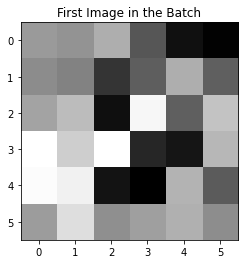

In [16]:
#if we want to visualize it, we need to 'squeeze' the first dimension(axis=0) 
#and then convert to numpy array
B0 = A[0].squeeze(dim=0)
print('Image-1 Shape: ', B0.shape)
B0_np = B0.numpy()
print('\nImage-1 Numpy\n ',B0_np)
plt.imshow(B0_np,cmap = 'gray')
plt.title('First Image in the Batch')
plt.show()

In [18]:
#let's analyse the second image in the batch. Notice that the A[1] is a 3D tensor.
print(A[1].shape)
print(A[1])

torch.Size([1, 6, 6])
tensor([[[226,  44, 247,  87,  74,  67],
         [  3, 250, 170, 180, 136, 120],
         [103, 210,  83,  18,  81, 165],
         [ 64, 146, 171,  24, 197, 128],
         [204, 159, 215,  27,  62, 101],
         [ 46, 123, 209,  50, 147, 103]]])


Image-2 Shape:  torch.Size([6, 6])

Image-1 Shape Array
  [[226  44 247  87  74  67]
 [  3 250 170 180 136 120]
 [103 210  83  18  81 165]
 [ 64 146 171  24 197 128]
 [204 159 215  27  62 101]
 [ 46 123 209  50 147 103]]


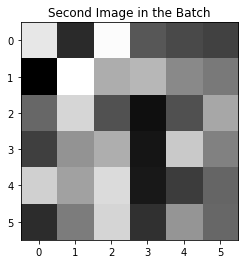

In [20]:
#if we want to visualize it, we need to 'squeeze' the first dimension(axis=0) 
#and then convert to numpy array
B1 = A[1].squeeze(dim=0)
print('Image-2 Shape: ', B1.shape)
B1_np = B1.numpy()
print('\nImage-1 Shape Array\n ',B1_np)
plt.imshow(B1_np,cmap = 'gray')
plt.title('Second Image in the Batch')
plt.show()

Let's walk backward from Numpy array to Pytorch tensor. Consider two gray-scale images of size 5x5. 
- (1) Let's generate them and visualize them first.
- (2) Convert to Pytorch tensors
- (2) Put them in 3D tensor form Channel x Height x Width with 'unsqueeze' which adds a dimension
- (3) Stack them into a 4D tensor of form Batch x Channel x Height x Width

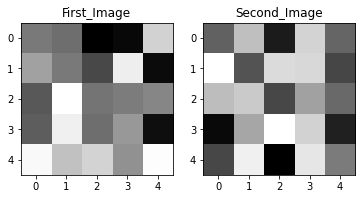

In [32]:
#(1) generate 2 gray-scale images and visualize
Im1 = np.random.randint(0,255,size = (5,5))
Im2 = np.random.randint(0,255,size = (5,5))
plt.subplot(1,2,1)
plt.imshow(Im1,cmap = 'gray')
plt.title('First_Image')
plt.subplot(1,2,2)
plt.imshow(Im2,cmap = 'gray')
plt.title('Second_Image')
plt.show()

In [33]:
#(2) Convert to Pytorch tensors calling 'from_numpy' function
Im1_Tensor = torch.from_numpy(Im1)
print(Im1_Tensor.type())
Im2_Tensor = torch.from_numpy(Im2)
print(Im2_Tensor.type())

torch.LongTensor
torch.LongTensor


In [34]:
#(3) Put them in 3D tensor form Channel x Height x Width with 'unsqueeze' 
Im1_Tensor = Im1_Tensor.unsqueeze(dim=0)
print(Im1_Tensor.shape)
Im2_Tensor = Im2_Tensor.unsqueeze(dim=0)
print(Im2_Tensor.shape)

torch.Size([1, 5, 5])
torch.Size([1, 5, 5])


In [35]:
#(4) Stack them into a 4D tensor of form Batch x Channel x Height x Width
A = torch.stack((Im1_Tensor,Im2_Tensor))
A.shape

torch.Size([2, 1, 5, 5])

## 2. Tensor Operations
Pretty much all the Numpy operations work for Pytorch tensors as well

In [36]:
A = torch.tensor([[3,4,7,7],
                  [9,5,9,1],
                  [-4,-3,5,0],
                  [-1,-2,5,1]])

In [37]:
A[0,:]

tensor([3, 4, 7, 7])

In [38]:
A[0:2,1:3]

tensor([[4, 7],
        [5, 9]])

In [ ]:
B = torch.tensor([[1,1,1,1],
                  [2,2,2,2],
                  [3,3,3,3]])
print(B)

Some unexpected results

In [ ]:
#sum over the elements of the first axis, which are the rows in fact.
B.sum(dim=0)

In [ ]:
print(B[0])
print(B[1])
print(B[2])
print('B[0]+B[1]+B[2] = ',B[0]+B[1]+B[2])

In [ ]:
B.sum(dim=1)

In [ ]:
print(B[0].sum())
print(B[1].sum())
print(B[2].sum())

Manipulating tensor with reshape, view, flatten

In [39]:
B = torch.randint(10,(3,4))
print('Before reshape =:\n',B)
C = torch.reshape(B,(2,6))
print('\nAfter reshape:\n', C)


Before reshape =:
 tensor([[1, 0, 0, 0],
        [3, 1, 7, 0],
        [2, 3, 4, 1]])

After reshape:
 tensor([[1, 0, 0, 0, 3, 1],
        [7, 0, 2, 3, 4, 1]])


In [40]:
#let the torch handle the other axis
C = B.view(-1,4)
print(C)

tensor([[1, 0, 0, 0],
        [3, 1, 7, 0],
        [2, 3, 4, 1]])


In [41]:
B.flatten()

tensor([1, 0, 0, 0, 3, 1, 7, 0, 2, 3, 4, 1])

In [42]:
B.view(-1)

tensor([1, 0, 0, 0, 3, 1, 7, 0, 2, 3, 4, 1])

### Argmax Operation

One important operation includes "torch.argmax" and "torch.eq" operations. Imagine we are doing image classification with 4 classes 

$Cat = 0, Dog = 1 ,Bird = 2, Panda = 3$

What we do, we feed many images at the same time. Let's say we feed 2-Dogs and 1-Panda. Our label array is

$$\text{label} = [1,1,3]$$

When we get the output from the model, it will look like;


$$
A = 
\begin{bmatrix}
12.2099 & 7.4075 & 1.9746,& 4.5719 \\
0.4014 & 19.8903 & 9.4084 & 9.3722 \\
3.3393 & 5.6968 & 8.2905 & 12.3987
\end{bmatrix}
$$

First row is the prediction for the first image and so on. Now, in each row, we get the **index of largest entry** and put this in an array using **"argmax"** command. This will be our prediction array. In this case, it must be

$$ \text{predictions} = [0,1,3]$$ 

Then we will count how many of the predictions is right. To do so, we will first Boolen compare labels and predictions using **"eq"** then count the True entries using **"sum"**. Carefully follow the example below

In [47]:
label = torch.tensor([1,1,3],dtype = torch.long)
print('labels:',label)
ouputs = torch.tensor([[12.2,7.4,1.9,4.5],
                 [0.4,19.8,9.4,9.3],
                  [3.3,5.6,8.2,12.3]])
predictions = ouputs.argmax(dim=1)
print(predictions)
print(predictions.eq(label))
print('Number of Correct Predictions: ', sum(predictions.eq(label)))

labels: tensor([1, 1, 3])
tensor([0, 1, 3])
tensor([False,  True,  True])
Number of Correct Predictions:  tensor(2)


In general, the operation looks like;

In [48]:
# correct labels
labels = torch.randint(0,4,size=(1,20))
labels

tensor([[1, 0, 0, 1, 3, 2, 1, 0, 3, 2, 2, 3, 3, 2, 1, 3, 3, 2, 3, 2]])

In [51]:
#model ouput
outputs = 10*torch.rand(20,4)
print(outputs)

tensor([[0.1121, 0.0606, 6.4346, 3.4020],
        [1.6538, 4.9836, 1.9874, 3.7609],
        [8.2753, 2.4633, 6.1641, 4.8444],
        [8.2476, 1.2120, 7.8649, 3.4182],
        [4.9221, 6.5001, 4.4258, 6.3559],
        [8.7869, 0.3426, 7.2336, 2.8140],
        [9.5892, 9.4656, 5.3058, 4.4837],
        [5.6994, 5.3669, 7.6640, 5.4913],
        [4.5842, 9.8467, 5.4943, 8.7420],
        [2.5474, 6.8340, 9.9592, 4.1495],
        [4.3323, 3.0639, 7.8624, 5.9778],
        [9.5666, 3.5837, 8.0645, 8.6291],
        [3.3210, 5.7720, 3.7761, 7.4641],
        [4.1377, 4.9784, 6.6240, 8.5176],
        [1.1522, 5.8596, 5.7860, 8.9133],
        [2.4062, 5.2168, 9.4030, 9.0329],
        [1.7854, 0.1549, 6.2901, 2.8576],
        [5.7590, 2.1607, 4.4988, 2.7868],
        [1.3261, 8.7748, 8.1485, 5.7029],
        [6.6027, 8.1908, 0.5871, 0.3665]])


In [52]:
#prediction for each image
predictions = outputs.argmax(dim=1)
print(predictions)

tensor([2, 1, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 3, 3, 3, 2, 2, 0, 1, 1])


In [53]:
#compare two labels vs predictions
predictions.eq(labels)

tensor([[False, False,  True, False, False, False, False, False, False,  True,
          True, False,  True, False, False, False, False, False, False, False]])

In [54]:
#count the correct(True) ones
number_of_correct = torch.sum(predictions.eq(labels))
print(number_of_correct.item())

4


## 3. Evaluating Derivatives with Pytorch

**Ex-1**

Find the derivative of $f(x) = 3x^2$ at $x=1$. Note that the answer is 6.

In [58]:
x = torch.tensor(1.,requires_grad = True)
y = 3*x**2

#take the derivative
y.backward()

#return the derivaitive
print(x.grad)

tensor(6.)


**Ex2**

Calculate the derivative of $f(x) = \big(x^2+ 7x + \cos(x)\big)^3 $ at $x=0$. Since $f'(x) = 3\big(x^2+ 7x + \cos(x)\big)^2\big(x+7-\sin(x)\big)$, we must have $f'(0)=21$ 

In [60]:
x = torch.tensor(0.,requires_grad = True)
y = (x**2 + 7*x + torch.cos(x))**3
y.backward()
print(x.grad)

tensor(21.)


**Ex3**

Now, let's evaluate partial derivatives. $f(x,y) = x^2+y^2 + e^{x+y}\cos(xy)$ at $x=1,y=2$

In [61]:
x = torch.tensor(1.,requires_grad = True)
y = torch.tensor(2.,requires_grad = True)
f = x**2 + y**2 + torch.exp(x+y)*torch.cos(x*y)
f.backward()
print('f_x: ',x.grad)
print("f_y: ",y.grad)

f_x:  tensor(-42.8860)
f_y:  tensor(-22.6223)


## 4. Linear Regression with Pytorch

Now, let's see how we do gradient decent with Pytorch. Our toy example is a simple linear regression problem. We will find the best line $$y=wx+b$$ to approximate a given set of data points $(x_i,y_i)_{i=1}^{N}$. Idea is to minimize the mean-square cost (MSE) function $$C=\dfrac{1}{N}\sum_{i=1}^{N}\Big(y(x_i)-y_i\Big)^2$$

Using chain rule, we can see that $$\dfrac{\partial C}{\partial w} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(y(x_i)-y_i\Big)x_i$$, $$ \dfrac{\partial C}{\partial b} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(y(x_i)-y_i\Big)1$$
Now we can go ahead and write the gradient decent for this problem. 

\begin{align}
    \begin{bmatrix}
           w_{n+1} \\
           b_{n+1} \\
     \end{bmatrix} =
     \begin{bmatrix}
           w_{n} \\
           b_{n} \\
      \end{bmatrix} -
      r\begin{bmatrix}
           \dfrac{\partial C}{\partial w} \\
          \dfrac{\partial C}{\partial b} \\
      \end{bmatrix}
\end{align}

We will have two approches;

- Implement naive graident decent with Pytorch
- Use optimizer provided by Pytorch

We can notice that Pytorch's implementation is way better in terms of error. That's why we must use the optimization tools provided in Pytorch

### a. Implement Naive Graident Decent with Pytorch

In [63]:
def MSE(y,y_pred):
    return ((y-y_pred)**2).mean()

def model(w,b,x):
    return w*x+b

@torch.no_grad()
def DisplayResults(w,b,X_test,Y_test):
    y_preds = w * X_test + b
    plt.figure(figsize=(6,5))
    plt.plot(X_test,y_preds,'-b',X_test,Y_test,'ro',markersize = 2)
    plt.legend(['predicted','real_values'])
    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.title('Linear_Regression_Model')
    plt.show()
    

In [64]:
#Pick w = 7 and b = 3 and some noise
N = 300
X = torch.rand(N)
Y = 7*X + 3*torch.ones(N) + torch.rand(N)

#train-test split
X_train = X[0:math.ceil(N*0.8)]
X_test = X[math.ceil(N*0.8):]

Y_train = Y[0:math.ceil(N*0.8)]
Y_test = Y[math.ceil(N*0.8):]

In [65]:
# initilize weight and bias
num_epochs = 400
lr = 1e-1
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
for i in range(num_epochs):
    #(1)FORWARD PASS
    
    #compute the predictions
    y_pred = model(w,b,X_train)
    
    #compute the loss
    loss = MSE(Y_train,y_pred)
    
    #(2)BACK-PROPOGATION    
    
    #compute the gradients
    loss.backward()
    
    #update the weights
    with torch.no_grad():
        w.data = w.data - lr * w.grad
        b.data = b.data - lr * b.grad
        w.grad.zero_()
        b.grad.zero_()
    if i%100==0:
        print(f'w: {w.item():0.5f} b : {b.item():0.5f} loss : {loss.item():0.8f}')

w: 1.73121 b : -0.05793 loss : 76.35734558
w: 6.41163 b : 3.84272 loss : 0.11096727
w: 6.84898 b : 3.59857 loss : 0.08083858
w: 6.94922 b : 3.54261 loss : 0.07925593


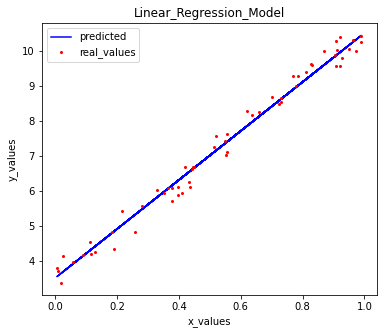

In [66]:
DisplayResults(w,b,X_test,Y_test)

### b. Implement  Graident Decent with Pytorch Optimizer

In [67]:
#Better way of doing gradient decent. In fact, this is what we must do!
optimizer = torch.optim.Adam([w, b], lr = 0.1)
for i in range(num_epochs):
    #(1)FORWARD PASS
    
    #compute the predictions
    y_pred = model(w,b,X_train)
    
    #compute the loss
    loss = MSE(Y_train,y_pred)
    
    #(2)BACK-PROPOGATION    
    
    #compute the gradients
    loss.backward()
    
    #update the parameters
    optimizer.step()
    
    #detach the gradients
    optimizer.zero_grad()
    
    if i%100==0:
        print(f'w: {w.item():0.5f} b : {b.item():0.5f} loss : {loss.item():0.8f}')

w: 7.07209 b : 3.42984 loss : 0.07917280
w: 6.97833 b : 3.52597 loss : 0.07916825
w: 6.97903 b : 3.52598 loss : 0.07916818
w: 6.97903 b : 3.52597 loss : 0.07916819


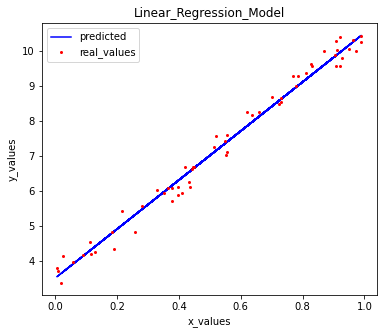

In [68]:
DisplayResults(w,b,X_test,Y_test)